# LightGBM
# Изотов Илья РИМ-191219

## Общие сведения об алгоритме

### Что такое LightGBM
LightGBM - это фреймворк градиентного бустинга, использующий алгоритм обучения на основе дерева.

Градиентный бустинг — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений. Про градиентный бустинг подробнее можно прочитать <a href="https://neurohive.io/ru/osnovy-data-science/gradientyj-busting/">тут</a>.

Ансамбль — это набор предсказателей, которые вместе дают ответ (например, среднее по всем). Причина почему мы используем ансамбли — несколько предсказателей, которые пытаюсь получить одну и ту же переменную дадут более точный результат, нежели одиночный предсказатель.

LightGBM выращивает дерево вертикально, в то время как другой алгоритм выращивает деревья горизонтально. Это означает, что Light GBM выращивает дерево по листьям (Leaf-wise), в то время как другой алгоритм растет по уровням (Level-wise). Он выберет лист с максимальной дельтой потерь для роста. При выращивании одного и того же листа, листовой алгоритм может уменьшить больше потерь, чем уровневый алгоритм.

Ниже изображен концепт реализации LightGBM и большинство других алгоритмов бустинга:

LightGBM:
![Другой алгоритм](img/1_AZsSoXb8lc5N6mnhqX5JCg.png)

Большинство алгоритмов бустинга:
![LightGBM](img/1_whSa8rY4sgFQj1rEcWr8Ag.png)

Преимущества:
* быстрая скорость обучения и высокая эффективность;
* более низкое использование памяти;
* точность;
* поддержка параллельного и GPU обучения;
* работа с большим количеством данных.

### Требования к данным

Не рекомендуется использовать LightGBM для небольших наборов данных, т.к. алгоритм чувствителен к переобучению. 

Рекомендуется для работы с данными, имеющими больше 10000 строк.

### Параметры LightGBM

LightGBM имеет больше сотни параметров. Вот наиболее важные из них. Все параметры можно увидеть тут (<a href="https://lightgbm.readthedocs.io/en/latest/Parameters.html">ссылка на документацию</a>).
#### Параметры управления
* <b>max_depth</b> - максимум глубины дерева. Этот параметр используется для защиты модели от переобучения. Если модель переобучается, необходимо понизить max_depth. (по умолчанию = -1, <= 0 означает отсутствие лимита)
* <b>min_data_in_leaf</b> - минимальное число записей, которое может иметь лист. По умолчанию значение равно 20, является оптимальным. Также защищает от переобучения. (min_data_in_leaf >= 0)
* <b>feature_fraction</b> - случайным образом выбирает часть фич в каждой итерации (каждом дереве) . feature_fracton = 0.8 означает, что LightBGM будет выбирать 80% фич случайным образом в каждой итерации для постройки деревьев. (по умолчанию 1.0, 0.0 < feature_fraction <= 1.0)
* <b>bagging_fraction</b> - как и feature_fraction, только указывает часть данных, которая будет использоваться в каждой итерации. Обычно используется для ускорения обучения и предотвращения переобучения. (по умолчанию 1.0, 0.0 < bagging_fraction <= 1.0).
* <b>early_stopping_round</b> - останавливает тренировку модели, если одна из метрик валидации не улучшится в течение early_stopping_round, что позволяет увеличить скорость анализа. (по умолчанию 0, если <=0 не исипользуется).
* <b>lambda, lambda_l2</b> - L2-регуляризация, "штраф" за большие весовые коэффициенты. (lambda >=0.0) 
* <b>min_gain_to_split</b> - описывает минимальный вес для деления (min gain to perform splitting), позволяет контролировать число полезных делений в дереве. (по умолчанию 0.0, min_gain_to_split >= 0.0) 
* <b>max_cat_group</b> - когда большое число категорий, нахождение точки деления может переобучить модель. LightGBM объединяет их в группы max_cat_group и находит точки деления на границах групп (по умолчанию 32, max_cat_group > 0)

#### Параметры ядра
* <b>objective, app, application</b>  - определяет применение модели: регрессия, бинарная классификация, мультиклассификация. (по умолчанию regression)
    + Для регрессии:
        + regression - L2-loss function, средне-квадратичная функция потерь
        + regression_l1 - L1-loss function, средний модуль отклонения
        + huber - Huber loss
        + fair - Fair loss
        + poisson - Poisson regression
        + quantile
        + mape
        + gamma
        + tweedie
    + Для бинарной классификации:
        + binary - бинарная логистическая регрессия
    + Для мультиклассовой классификации:
        + multiclass - функция softmax
        + multiclassova, ova - функция OvR (one-vs.-rest, "один против всех")
        + num_class 
    + для кросс-энтропии:
        + cross_entropy - целевая функция для кросс-энтропии
        + cross_entropy_lambda - альтернативная параметризация кросс-энтропии


* <b>boosting</b> - тип алгоритма для запуска (по умолчанию gbdt):
    + gbdt - Gradient Boosting Decision Tree
    + rf - random forest
    + dart - Dropouts meet Multiple Additive Regression Trees
    + goss - Gradient-based One-Side Sampling
* <b>num_iterations, num_boost_round</b> - количество итераций бустинга, обычно больше 100 (по умолчанию 100, num_iterations >= 0).
* <b>learning_rate</b> - скорость обучения. (по умолчанию 0.1, learning_rate > 0.0)
* <b>num_leaves</b> - количество листьев в полном дереве. (по умолчанию 31, 1 < num_leaves <= 131072)
* <b>device, device_type</b> - выбор устройства для обучения дерева: cpu, gpu. (по умолчанию cpu)

#### Параметр метрики
+ <b>metric</b> - определеяет метрику для оценки на наборе данных:
    + "" (не указана, используется по умолчанию) - будет использоваться метрика, которая определена в objective, если это возможно
    + "None" - ни одна метрика не будет зарегистрирована
    + l1, mae - средняя абсолютная ошибка
    + l2, mse - средняя квадратичная ошибка
    + rmse - квадратный корень потерь
    + binary_logloss - потеря для двоичной классификации
    + multi_logloss - потеря для мультиклассификации
    + и другие.

#### Параметры ввода-вывода
+ <b>max_bin</b> - максимальное количество ячеек, в которые будут добавлены значения признаков. Небольшое значение max_bin может снизить точность обучения, но увеличить общую мощность. (по умолчанию = 255).
+ <b>categorical_feature</b> - обозначает индекс категориальных признаков. Например, если categorial_feature = 0,1,2 то столбцы 0, 1 и 2 являются категориальными переменными. Можно использовать categorical_feature = name:c1,c2,c3, тогда колонки c1, c2 и c3 будут являться категориальными. (по умолчанию "")
+ <b>ignore_column</b> - используется для указания игнорируемых столбцов. Синтаксис аналогичен categorical_feature. (по умолчанию "") 
+ <b>save_binary</b> - если true, то LightGBM сохранит набор данных (включая данные проверки) в двоичный файл, что позволит ускорить загрузку данных в следующий раз (используется в CLI).

## Практика

### Установка LightGBM

In [3]:
!pip install lightgbm

Или через Anaconda command prompt:

<i>conda install -c conda-forge lightgbm</i>

Инструкция для настройки использования GPU на Windows находится <a href="https://lightgbm.readthedocs.io/en/latest/GPU-Windows.html">тут</a>

### Категоризация

![Титаник](img/227516.jpg)

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import os
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
#import lightgbm
#from sklearn import datasets

#### Загрузка данных
Ссылка на датасет: https://www.kaggle.com/c/titanic/data

In [2]:
path = "./datasets/"
train_df = pd.read_csv(os.path.join(path, "titanic_train.csv"))
test_df = pd.read_csv(os.path.join(path, "titanic_test.csv"))
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S


In [3]:
used_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

#### Подготовка данных

In [4]:
y_train = train_df[['Survived']]
y_train.shape

(891, 1)

Объединение проверочного и тренировочного набора для совместной подготовки

In [5]:
X_All = train_df[used_columns].append(test_df[used_columns])
X_All.shape

(1309, 6)

In [6]:
X_All.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        1
Embarked    2
dtype: int64

In [7]:
X_All['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Отсутствующие данные по классу заменяются на самый частый класс "S", а отсутствующая цена билета - на медианную.

In [8]:
X_All['Embarked'].fillna('S', inplace=True)
X_All['Fare'].fillna(X_All['Fare'].median(), inplace=True)

Подготовка категориальных данных

In [9]:
X_All["Sex"] = X_All["Sex"].map({"male":1, "female": 0}).astype(int)
X_All["Embarked"] = X_All["Embarked"].map({"S": 1, "C": 2, "Q": 3}).astype(int)   

Добавление фичей

In [10]:
X_All['FamilySize'] = X_All['SibSp']+ X_All['Parch'] + 1
X_All['IsAlone'] = X_All['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

In [11]:
X_All.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,1,1,0,7.2500,1,2,0
1,1,0,1,0,71.2833,2,2,0
2,3,0,0,0,7.9250,1,1,1
3,1,0,1,0,53.1000,1,2,0
4,3,1,0,0,8.0500,1,1,1


In [12]:
categorical_columns = ['Sex', 'Parch', 'Embarked', 'IsAlone']

Разделение подготовленных данных на изначальные наборы и формирование выборки для тренировки и проверки модели

In [13]:
X_train = X_All[0:y_train.shape[0]] 
X_test = X_All[y_train.shape[0]:]
X_train.shape, y_train.shape, X_test.shape


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((730, 8), (161, 8), (730, 1), (161, 1))

#### Подготовка модели

Настройка параметров:

In [14]:
params = {
    'num_iterations' : 60, # количество эпох
    'learning_rate' : 0.1, # шаг обучения
    'boosting_type' : 'goss', # тип алгоритма бустинга
    'objective' : 'binary', # выбор бинарной классификации
    'metric' : 'binary_logloss', # метрика - логистическая регрессия
    'feature_fraction' : 0.75, # количество фич, используемых в итерации
    'num_leaves' : 60, # максимальное количество листьев на дереве
    'min_data_in_leaf' : 15, # минимальное количество данных на листе
    'max_depth' : 4, # глубина дерева
    'cateforical_feature' : [categorical_columns] # категориальные фичи
    #'device' : ["gpu"]
}

Обучение

In [15]:
train_dataset = lgb.Dataset(X_train, label=y_train)
val_dataset = lgb.Dataset(X_val, label=y_val)

lgb_model = lgb.train(params, train_set=train_dataset, valid_sets=val_dataset)

[1]	valid_0's binary_logloss: 0.626709
[2]	valid_0's binary_logloss: 0.607692
[3]	valid_0's binary_logloss: 0.595111
[4]	valid_0's binary_logloss: 0.570171
[5]	valid_0's binary_logloss: 0.548904
[6]	valid_0's binary_logloss: 0.539235
[7]	valid_0's binary_logloss: 0.518806
[8]	valid_0's binary_logloss: 0.501258
[9]	valid_0's binary_logloss: 0.493294
[10]	valid_0's binary_logloss: 0.480771
[11]	valid_0's binary_logloss: 0.470438
[12]	valid_0's binary_logloss: 0.464728
[13]	valid_0's binary_logloss: 0.456914
[14]	valid_0's binary_logloss: 0.448406
[15]	valid_0's binary_logloss: 0.44356
[16]	valid_0's binary_logloss: 0.440617
[17]	valid_0's binary_logloss: 0.435295
[18]	valid_0's binary_logloss: 0.429037
[19]	valid_0's binary_logloss: 0.428346
[20]	valid_0's binary_logloss: 0.424619
[21]	valid_0's binary_logloss: 0.419698
[22]	valid_0's binary_logloss: 0.419045
[23]	valid_0's binary_logloss: 0.416457
[24]	valid_0's binary_logloss: 0.413466
[25]	valid_0's binary_logloss: 0.411058
[26]	valid

#### Предсказание

In [16]:
y_test = lgb_model.predict(X_test)
y_test = np.around(y_test)
y_test = y_test.astype(int)

In [17]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [18]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived' : y_test
})
submission.to_csv("submission.csv", index=False)

#### Пресказание с выбором параметров

In [19]:
params_grid = {
    'num_iterations': [40, 50, 60], # количество эпох
    'learning_rate': [0.08, 0.1, 0.12], # шаг обучения
    'num_leaves': [30, 40, 60], # максимальное количество листьев на дереве
    'min_data_in_leaf': [15, 30, 40], # минимальное количество данных на листе
    'max_depth': [2,4], # глубина дерева
    'feature_fraction' : [0.75,1] # количество фич, используемых в итерации
}

GS = GridSearchCV(lgb.LGBMClassifier(), params_grid, cv=5).fit(X_train, y_train, categorical_feature=categorical_columns)


In [20]:
print(accuracy_score(y_train, GS.predict(X_train)))
print(GS.best_score_)
# print(accuracy_score(y_val, lgbm_model.predict(X_val)))
print(GS.best_params_)
print(GS.best_estimator_)

0.8123287671232877
0.810958904109589
{'feature_fraction': 1, 'learning_rate': 0.08, 'max_depth': 2, 'min_data_in_leaf': 40, 'num_iterations': 40, 'num_leaves': 30}
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=1, importance_type='split', learning_rate=0.08,
               max_depth=2, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=40, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_iterations=40, num_leaves=30, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [21]:
lgb_model = lgb.train(GS.best_params_, train_set=train_dataset, valid_sets=val_dataset)

In [22]:
lgb_model.params

{'feature_fraction': 1,
 'learning_rate': 0.08,
 'max_depth': 2,
 'min_data_in_leaf': 40,
 'num_leaves': 30,
 'num_iterations': 40,
 'early_stopping_round': None}

In [23]:
y_test = lgb_model.predict(X_test)
y_test = np.around(y_test)
y_test = y_test.astype(int)
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived' : y_test
})
submission.to_csv("submission.csv", index=False)

### Регрессия

![Домик](img/original.jpg)

In [25]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, "./../exploratory_analysis")
import expdataanalysis as eda

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split

#### Загрузка данных
Ссылка на датасет: https://www.kaggle.com/harlfoxem/housesalesprediction

In [26]:
path = "./datasets/"
df = pd.read_csv(os.path.join(path, "kc_house_data.csv"))

In [27]:
df.shape

(21613, 21)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3643,1561600025,20140603T000000,712500.0,3,1.50,1660,8797,1.0,0,0,...,7,1660,0,1956,0,98004,47.5892,-122.202,2350,10053
9018,267020090,20140818T000000,580000.0,5,2.50,3110,15783,1.0,0,0,...,8,1720,1390,1974,0,98052,47.6301,-122.103,2550,12220
7255,1005000250,20150130T000000,350000.0,2,1.00,840,5551,1.0,0,0,...,6,840,0,1952,0,98118,47.5354,-122.280,1270,4652
274,4235400186,20141124T000000,331000.0,3,1.75,1080,1306,1.0,0,0,...,7,580,500,1954,2003,98199,47.6601,-122.400,1440,2225
21285,832700170,20150421T000000,319000.0,2,1.50,1090,847,3.0,0,0,...,8,1090,0,2009,0,98133,47.7235,-122.352,1090,1118


#### Подготовка данных

In [30]:
df.loc[df['yr_renovated']>0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
35,9547205180,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,...,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
103,2450000295,20141007T000000,1088000.0,3,2.50,2920,8113,2.0,0,0,...,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113
115,3626039325,20141121T000000,740500.0,3,3.50,4380,6350,2.0,0,0,...,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,7351200295,20150114T000000,1150000.0,3,1.75,1760,6788,2.0,1,4,...,7,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588
20057,126039256,20140904T000000,434900.0,3,2.00,1520,5040,2.0,0,0,...,7,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710
20444,4305600360,20150225T000000,500012.0,4,2.50,2400,9612,1.0,0,0,...,8,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539
20447,3319500628,20150212T000000,356999.0,3,1.50,1010,1546,2.0,0,0,...,8,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517


In [31]:
df['is_renovated'] = 0
df.loc[df['yr_renovated']>0, 'is_renovated'] = 1

In [32]:
df.loc[df['is_renovated']>0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
35,9547205180,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,...,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264,1
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045,1
103,2450000295,20141007T000000,1088000.0,3,2.50,2920,8113,2.0,0,0,...,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113,1
115,3626039325,20141121T000000,740500.0,3,3.50,4380,6350,2.0,0,0,...,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,7351200295,20150114T000000,1150000.0,3,1.75,1760,6788,2.0,1,4,...,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588,1
20057,126039256,20140904T000000,434900.0,3,2.00,1520,5040,2.0,0,0,...,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710,1
20444,4305600360,20150225T000000,500012.0,4,2.50,2400,9612,1.0,0,0,...,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539,1
20447,3319500628,20150212T000000,356999.0,3,1.50,1010,1546,2.0,0,0,...,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517,1


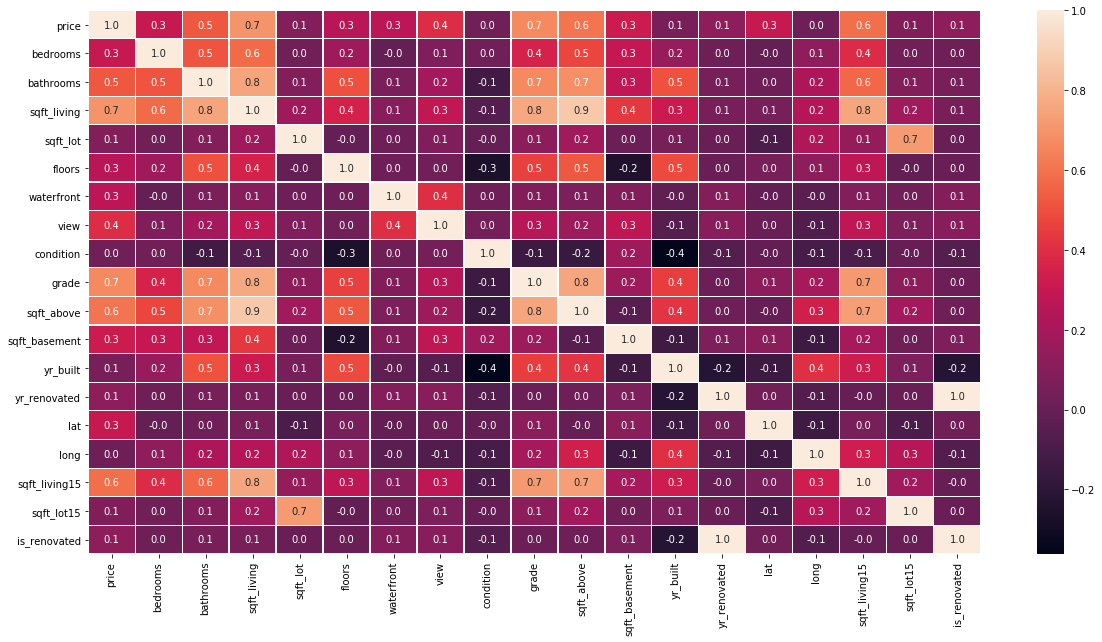

In [34]:
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.loc[:, ~df.columns.isin(['id', 'zipcode'])].corr(),annot=True, linewidths=.1, fmt='.1f', ax=ax)
plt.show()

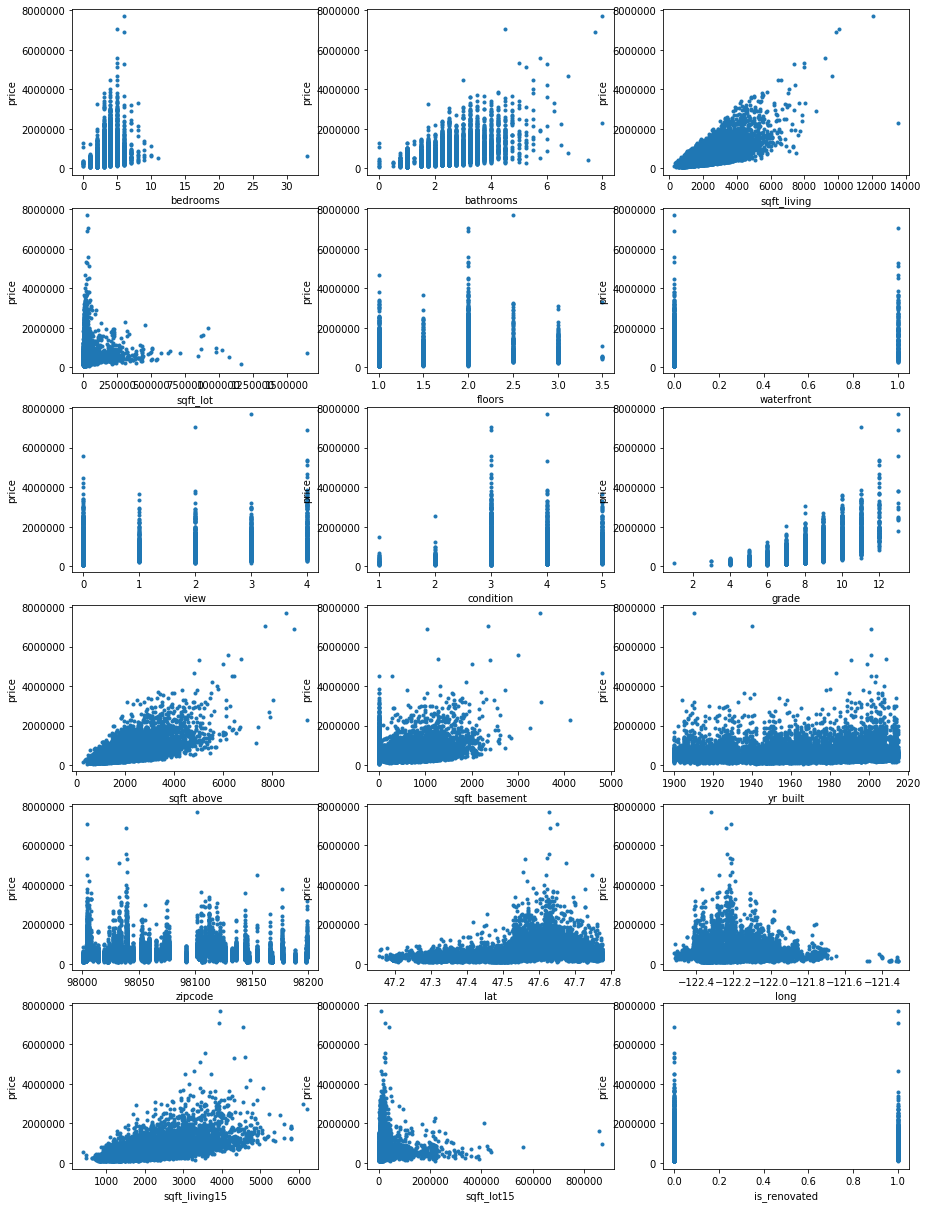

In [35]:
plt.figure(figsize=(15,25))
j=1

for i in df.columns.drop(['id', 'date', 'price', 'yr_renovated']):
    plt.subplot(7,3,j)
    plt.plot(df.loc[:,i],df.price,'.')
    plt.xlabel(i)
    plt.ylabel("price")
    j = j+1
plt.show()

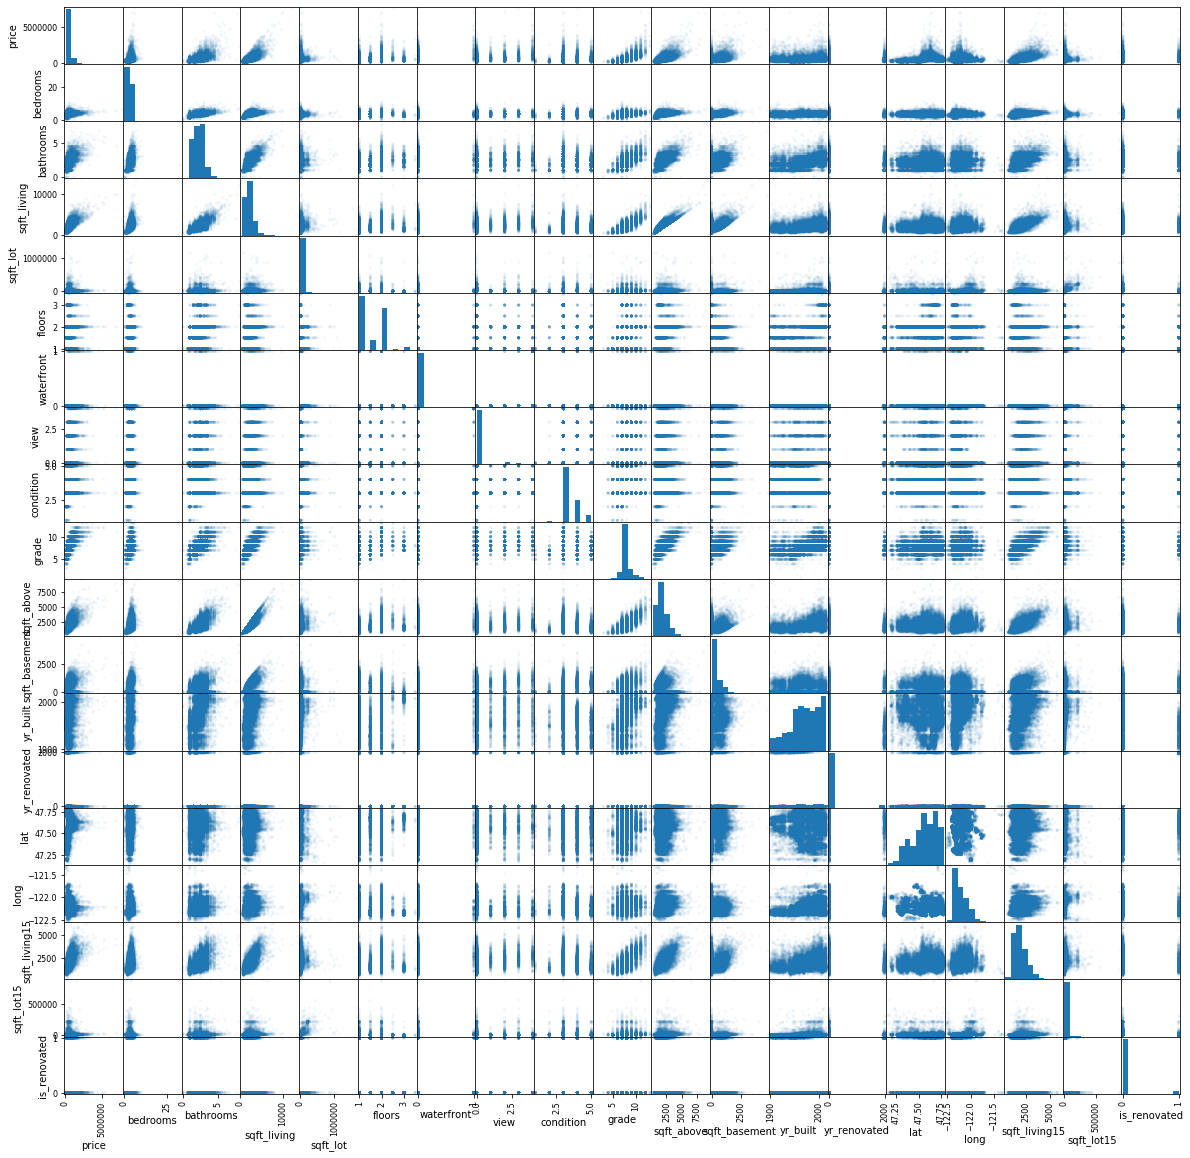

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.loc[:, ~df.columns.isin(['id', 'zipcode'])], alpha=0.05, figsize=(20, 20));

{'whiskers': [<matplotlib.lines.Line2D at 0x23f3dd99ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x23f3e6671c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f3c136048>],
 'medians': [<matplotlib.lines.Line2D at 0x23f3e6adec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f3e6ad908>],
 'means': []}

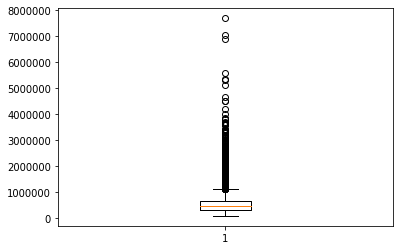

In [37]:
plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x23f3e723a88>,
 'caps': [<matplotlib.lines.Line2D at 0x23f3e726a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f33c13108>],
 'medians': [<matplotlib.lines.Line2D at 0x23f3e7359c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f3e735ac8>],
 'means': []}

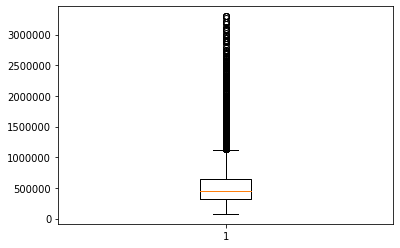

In [38]:
df= df.loc[df.price<=3300000]
plt.boxplot(df.price)

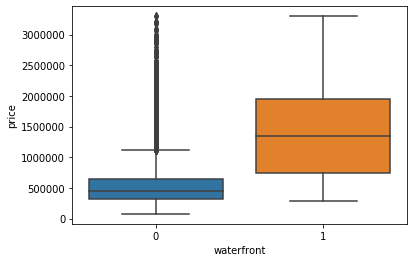

In [39]:
sns.boxplot(y=df['price'], x=df['waterfront'])

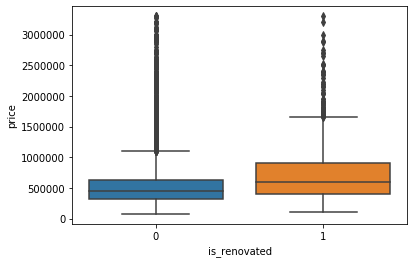

In [40]:
sns.boxplot(y=df['price'], x=df['is_renovated'])

In [41]:
categorical_columns = ['waterfront','is_renovated']

Деление данных на тренировочную и тестовую выборки

In [42]:
X = df.drop(['id', 'date', 'price', 'yr_renovated','view'],axis=1)
y = df['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((17268, 17), (4318, 17), (17268,), (4318,))

#### Подготовка модели и предсказание

In [51]:
params = {
    'n_estimators' : 220, # количество эпох
    'learning_rate' : 0.08, # шаг обучения
    'boosting_type' : 'gbdt', # тип алгоритма бустинга
    'objective' : 'poisson', # выбор регресси
    'metric' : 'rmse', # метрика 
    'feature_fraction' : 0.75, # количество фич, используемых в итерации
    'num_leaves' : 50, # максимальное количество листьев на дереве
    'min_data_in_leaf' : 15, # минимальное количество данных на листе
    'max_depth' : 25, # глубина дерева
    'max_bin' : 1000,
    'cateforical_feature' : [categorical_columns] # категориальные фичи
    #'device' : ["gpu"]
}

In [52]:
train_dataset = lgb.Dataset(X_train, label=y_train)
val_dataset = lgb.Dataset(X_val, label=y_val)

lgb_model = lgb.train(params, train_set=train_dataset, valid_sets=val_dataset)

[1]	valid_0's rmse: 325212
[2]	valid_0's rmse: 315072
[3]	valid_0's rmse: 305364
[4]	valid_0's rmse: 296135
[5]	valid_0's rmse: 288371
[6]	valid_0's rmse: 279958
[7]	valid_0's rmse: 271790
[8]	valid_0's rmse: 263932
[9]	valid_0's rmse: 256551
[10]	valid_0's rmse: 249400
[11]	valid_0's rmse: 242542
[12]	valid_0's rmse: 235672
[13]	valid_0's rmse: 230333
[14]	valid_0's rmse: 224147
[15]	valid_0's rmse: 218461
[16]	valid_0's rmse: 212750
[17]	valid_0's rmse: 207645
[18]	valid_0's rmse: 202647
[19]	valid_0's rmse: 197936
[20]	valid_0's rmse: 193241
[21]	valid_0's rmse: 188957
[22]	valid_0's rmse: 185059
[23]	valid_0's rmse: 181149
[24]	valid_0's rmse: 177228
[25]	valid_0's rmse: 173974
[26]	valid_0's rmse: 170463
[27]	valid_0's rmse: 167434
[28]	valid_0's rmse: 164306
[29]	valid_0's rmse: 161331
[30]	valid_0's rmse: 158886
[31]	valid_0's rmse: 156063
[32]	valid_0's rmse: 153683
[33]	valid_0's rmse: 151332
[34]	valid_0's rmse: 148939
[35]	valid_0's rmse: 146655
[36]	valid_0's rmse: 144601
[

In [53]:
y_val = y_val.reset_index()
y_val = y_val['price']

In [54]:
pred = lgb_model.predict(X_val)

In [55]:
np.corrcoef(pred, y_val)

array([[1.        , 0.95069205],
       [0.95069205, 1.        ]])

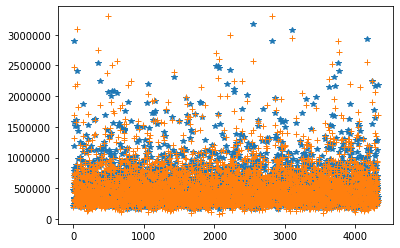

In [56]:
plt.plot(pred, '*')
plt.plot(y_val, '+')

plt.show()